In [36]:
import pandas as pd
import numpy as np
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from pandas_profiling import ProfileReport
from collections import Counter

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [3]:
from sklearn.datasets import load_wine
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification

In [4]:
wine = load_wine()
wine_df = pd.DataFrame(wine['data'], columns=wine['feature_names'])
wine_df['class'] = wine['target']
wine_df['class_name'] = wine_df['class'].map(dict(zip([0, 1, 2], wine['target_names'])))
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class,class_name
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


<AxesSubplot:ylabel='color_intensity'>

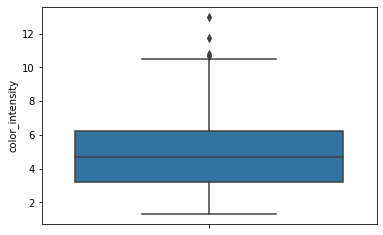

In [5]:
sns.boxplot(data=wine_df, y='color_intensity', whis=1.5)

<AxesSubplot:>

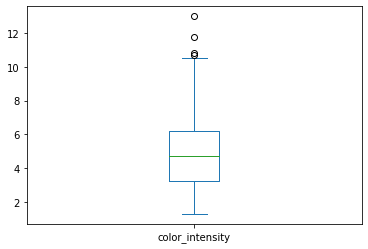

In [6]:
wine_df['color_intensity'].plot.box()

In [7]:
quartile_1, quartile_3 = np.percentile(wine_df['color_intensity'], [25, 75])
iqr = quartile_3 - quartile_1
upper_whis = quartile_3 + (iqr * 1.5)
lower_whis = quartile_1 - (iqr * 1.5)
upper_whis, lower_whis

(10.670000000000002, -1.2500000000000009)

<AxesSubplot:>

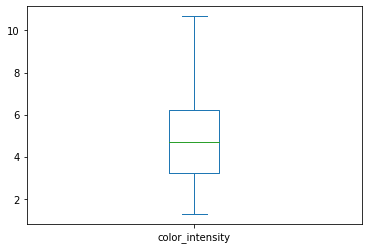

In [8]:
wine_df['color_intensity'].clip(upper=upper_whis, lower=lower_whis).plot.box()

In [9]:
def outliers_iqr(df, col):
    quartile_1, quartile_3 = np.percentile(df[col], [25, 75])
    iqr = quartile_3 - quartile_1
    upper_whis = quartile_3 + (iqr * 1.5)
    lower_whis = quartile_1 - (iqr * 1.5)
    outliers_df = df[(df[col] > upper_whis) | (df[col] < lower_whis)]
    return outliers_df[[col]]

In [10]:
outliers_iqr(wine_df, 'color_intensity')

,color_intensity
151,10.80
158,13.00
159,11.75
166,10.68


In [11]:
iris = load_iris()
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['class'] = iris['target']
iris_df['class_name'] = iris_df['class'].map(dict(zip([0, 1, 2], iris['target_names'])))
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,class_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [12]:
iris_dummy = pd.get_dummies(iris_df.drop('class', axis=1), columns=['class_name'])
iris_dummy.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class_name_setosa,class_name_versicolor,class_name_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris_df.iloc[:, :-2], iris_df['class'], test_size=0.25, random_state=0)

In [14]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
61,5.9,3.0,4.2,1.5
92,5.8,2.6,4.0,1.2
112,6.8,3.0,5.5,2.1
2,4.7,3.2,1.3,0.2
141,6.9,3.1,5.1,2.3
...,...,...,...,...
9,4.9,3.1,1.5,0.1
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
117,7.7,3.8,6.7,2.2


In [15]:
robust_scaler = RobustScaler(quantile_range=(25, 75)).fit(X_train)
X_train_sc = robust_scaler.transform(X_train)
X_test_sc = robust_scaler.transform(X_test)
X_train_sc.min(), X_train_sc.max()

(-2.0, 2.8000000000000007)

In [16]:
robust_scaler.inverse_transform(X_train_sc)

array([[5.9, 3. , 4.2, 1.5],
       [5.8, 2.6, 4. , 1.2],
       [6.8, 3. , 5.5, 2.1],
       [4.7, 3.2, 1.3, 0.2],
       [6.9, 3.1, 5.1, 2.3],
       [5. , 3.5, 1.6, 0.6],
       [5.4, 3.7, 1.5, 0.2],
       [5. , 2. , 3.5, 1. ],
       [6.5, 3. , 5.5, 1.8],
       [6.7, 3.3, 5.7, 2.5],
       [6. , 2.2, 5. , 1.5],
       [6.7, 2.5, 5.8, 1.8],
       [5.6, 2.5, 3.9, 1.1],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.3, 4.7, 1.6],
       [5.5, 2.4, 3.8, 1.1],
       [6.3, 2.7, 4.9, 1.8],
       [6.3, 2.8, 5.1, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [6.3, 2.5, 5. , 1.9],
       [7. , 3.2, 4.7, 1.4],
       [6.5, 3. , 5.2, 2. ],
       [6. , 3.4, 4.5, 1.6],
       [4.8, 3.1, 1.6, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.6, 2.7, 4.2, 1.3],
       [5.6, 2.9, 3.6, 1.3],
       [5.5, 2.5, 4. , 1.3],
       [6.1, 3. , 4.6, 1.4],
       [7.2, 3.2, 6. , 1.8],
       [5.3, 3.7, 1.5, 0.2],
       [4.3, 3. , 1.1, 0.1],
       [6.4, 2.7, 5.3, 1.9],
       [5.7, 3. , 4.2, 1.2],
       [5.4, 3

In [19]:
pca = PCA(n_components=4).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

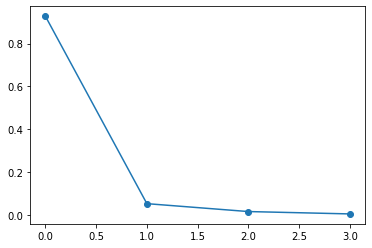

In [23]:
plt.plot(pca.explained_variance_ratio_, marker='o')

In [25]:
pca = PCA(n_components=2).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

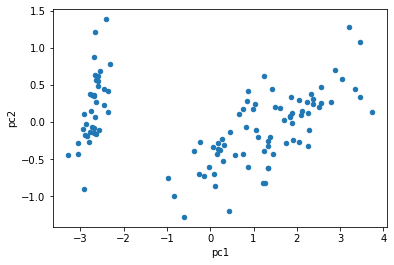

In [32]:
pca_train_df = pd.DataFrame(X_train_pca, columns=['pc1', 'pc2'])
pca_train_df.plot.scatter(x='pc1', y='pc2')

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

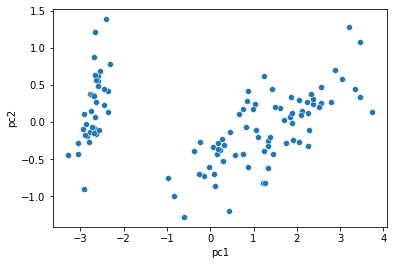

In [35]:
sns.scatterplot(data=pca_train_df, x='pc1', y='pc2')

In [40]:
x, y = make_classification(n_samples=2000, n_features=6, weights=[0.95], flip_y=0)
Counter(y)

Counter({0: 1900, 1: 100})

In [43]:
undersample = RandomUnderSampler(sampling_strategy='majority')
x_under, y_under = undersample.fit_resample(x, y)
Counter(y_under)

Counter({0: 100, 1: 100})

In [44]:
undersample = RandomUnderSampler(sampling_strategy=0.5)
x_under, y_under = undersample.fit_resample(x, y)
Counter(y_under)

Counter({0: 200, 1: 100})

In [45]:
oversample = RandomOverSampler(sampling_strategy='minority')
x_over, y_over = oversample.fit_resample(x, y)
Counter(y_over)

Counter({0: 1900, 1: 1900})

In [46]:
oversample = RandomOverSampler(sampling_strategy=0.5)
x_over, y_over = oversample.fit_resample(x, y)
Counter(y_over)

Counter({0: 1900, 1: 950})

In [47]:
smotesample = SMOTE(sampling_strategy='minority')
x_smote, y_smote = smotesample.fit_resample(x, y)
Counter(y_smote)

Counter({0: 1900, 1: 1900})